<a href="https://colab.research.google.com/github/LipatJob/AutomatedEssayScorer/blob/main/Automated_Essay_Scorer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup libraries

In [ ]:
!pip install tensorflow-text
!pip install -q tf-models-official
import nltk
nltk.download("popular")
# SAVE A SHORTCUT OF THE FOLLOWING LINK TO YOUR GOOGLE DRIVE:
# https://drive.google.com/drive/folders/1AFusNxapA1x8sVcjBwzbvluuzyUnm0JX?fbclid=IwAR3fHGqRBcCyCtAmEEUVoYlQQe9O1rsKTtMw46r3hFRXX9yRueE_1G6DpR4
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv('https://raw.githubusercontent.com/LipatJob/Dataset/main/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')

In [ ]:
import numpy as np

def train_valid_test_split(data, train_percentage, valid_percentage):
  return np.split(data.sample(frac=1, random_state=2).reset_index(), [int(train_percentage*len(data)), int((train_percentage + valid_percentage)*len(data))])

train, valid, test = train_valid_test_split(dataset, .6, .2)

print("train: ", train.shape)
print("valid: ", valid.shape)
print("test: ", test.shape)

train:  (7785, 29)
valid:  (2595, 29)
test:  (2596, 29)


In [ ]:
train

,index,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,4291,6688,3,From the setting that affected the cyclist are...,1,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,757,760,1,"Computers are great, they can help you with an...",4,5,NaN,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3553,4748,2,"No, materials should not be removed from the l...",2,3,NaN,2,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6259,9816,4,The author concludes the story with this parag...,2,2,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2095,3290,2,Books mean a lot to people that love to read. ...,4,3,NaN,4,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7780,12242,19550,7,My friend an I were wateng to go no a new ride...,4,4,NaN,8,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7781,5270,7670,3,A response that explains how the feature of th...,0,0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7782,1795,2990,2,"A library is a place you can go to read, write...",5,4,NaN,5,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7783,10984,18173,7,When I was about nine years old. I took my hom...,6,8,NaN,14,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocess Dataset

In [ ]:
def filter_columns(data):
  return data[["essay", "domain1_score"]]

In [ ]:
def split_X_y(data):
  return data["essay"], data["domain1_score"]

In [ ]:
import numpy as np

def to_array(X, y):
  return np.array(X), np.array(y)

In [ ]:
def preprocess(data):
  data = filter_columns(data)
  X, y = split_X_y(data)
  X, y = to_array(X, y)
  return X, y

train_X, train_y = preprocess(train)
valid_X, valid_y = preprocess(valid)
test_X, test_y = preprocess(test)

train_X, train_y

(array(['From the setting that affected the cyclist are possible conditions such as the weather and surrounding enviorment like hills and streams or even tyes of animals and if they are poisenous or not. The setting has and can change the desision a cyclist makes.',
        "Computers are great, they can help you with anything you need. You can shop on then, pay bills, even book a flight to go on vacation, but people are spending too much time on them. They should only spend a certain amount of time on them and not all day. Many people are spending more than enough time on the computer People ran often stay on the computer for hours and not even relize it, they stay up all @TIME1 doing work, or playing games. @TIME1 a while it will eventually take a toll on the body. Because @CAPS2 you are on the machine all day then you are using little to no energy at all. So then you spend @CAPS1 nights in bed tossing and turning. Then that leeds to feelings horrible in the @TIME2, @CAPS2 you do it 

## Extract Non Sequential Features

In [ ]:
import nltk, re, collections
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet

In [ ]:
# tokenize essay
def tokenize(essay):
  stripped_essay = essay.strip()
    
  tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
  raw_sentences = tokenizer.tokenize(stripped_essay)
    
  tokenized_sentences = []
  for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
      tokenized_sentences.append(sentence_to_wordlist(raw_sentence))
    
  return tokenized_sentences

In [ ]:
# Tokenize sentence
def sentence_to_wordlist(raw_sentence):

  clean_sentence = re.sub("[^a-zA-z0-9]", " ", raw_sentence)
  tokens = nltk.word_tokenize(clean_sentence)

  return tokens

In [ ]:
# count number of words

def count_characters(essay):
  clean_essay = re.sub(r'\W', ' ', essay)
  words = nltk.word_tokenize(clean_essay)
    
  return len(words) 

In [ ]:
# count number of words

def count_words(essay):
  clean_essay = re.sub(r'\W', ' ', essay)
  words = nltk.word_tokenize(clean_essay)
    
  return len(words)

In [ ]:
# count number of sentences

def count_sentences(essay):
  sentences = nltk.sent_tokenize(essay)
    
  return len(sentences)

In [ ]:
# calculate average word length in an essay

def avg_word_len(essay):
  clean_essay = re.sub(r'\W', ' ', essay)
  words = nltk.word_tokenize(clean_essay)
    
  return sum(len(word) for word in words) / len(words)

In [ ]:
# calculate average sentence length (in words)

def avg_sent_len(essay):
  sentences = nltk.sent_tokenize(essay)
  sent_lengths = []

  for sentence in sentences:
    words = nltk.word_tokenize(sentence)
    sent_lengths.append(len(words))

  return sum(sent_lengths) / len(sentences)

In [ ]:
# count number of lemmas
wordnet_lemmatizer = WordNetLemmatizer()

def count_lemmas(tokenized_sentences):   
  lemmas = []
  for sentence in tokenized_sentences:
    tagged_tokens = nltk.pos_tag(sentence) 
    for token_tuple in tagged_tokens:
      pos_tag = token_tuple[1]
      if pos_tag.startswith('N'): 
        pos = wordnet.NOUN
        lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
      elif pos_tag.startswith('J'):
        pos = wordnet.ADJ
        lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
      elif pos_tag.startswith('V'):
        pos = wordnet.VERB
        lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
      elif pos_tag.startswith('R'):
        pos = wordnet.ADV
        lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
      else:
        pos = wordnet.NOUN
        lemmas.append(wordnet_lemmatizer.lemmatize(token_tuple[0], pos))
    
  lemma_count = len(set(lemmas))
    
  return lemma_count

In [ ]:
from nltk.corpus import wordnet

# count mispelled words
def get_words_in_essay(essay):
  clean_essay = re.sub(r'\W', ' ', str(essay).lower())
  clean_essay = re.sub(r'[0-9]', ' ', clean_essay)
  return clean_essay.split()

def count_spell_error(essay):
  words_in_essay = get_words_in_essay(essay)
  correctly_spelled_words = [1 for word in words_in_essay if wordnet.synsets(word)]
  return len(correctly_spelled_words)

In [ ]:
# count vocabulary size
def count_vocab_size(essay):
  words_in_essay = get_words_in_essay(essay)
  unique_words = []

  for word in words_in_essay:
    if word not in unique_words:
      unique_words.append(word)
  
  return len(unique_words)

In [ ]:
# count number of nouns, adjectives, verbs, and adverbs in an essay
def count_pos(tokenized_sentences): 
  noun_count = 0
  adj_count = 0
  verb_count = 0
  adv_count = 0

  for sentence in tokenized_sentences:
    tagged_tokens = nltk.pos_tag(sentence)

    for token_tuple in tagged_tokens:
      pos_tag = token_tuple[1]

      if pos_tag.startswith('N'):
        noun_count += 1
      elif pos_tag.startswith('J'):
        adj_count += 1
      elif pos_tag.startswith('V'):
        verb_count += 1
      elif pos_tag.startswith('R'):
        adv_count += 1

  return noun_count, adj_count, verb_count, adv_count

In [ ]:
def extract_features(essays):
  essays = pd.Series(essays)
  tokenized_sentences = essays.apply(tokenize)
  char_count = essays.apply(count_characters)
  word_count = essays.apply(count_words)
  sentence_count = essays.apply(count_sentences)
  average_word_length = essays.apply(avg_word_len)
  average_sentence_length = essays.apply(avg_sent_len)
  lemma_count = tokenized_sentences.apply(count_lemmas)
  spelling_error_count = essays.apply(count_spell_error)
  vocabulary_count = essays.apply(count_vocab_size)
  noun_count, adj_count, verb_count, adv_count = zip(*tokenized_sentences.map(count_pos))

  return pd.DataFrame({
    'char_count' : char_count,
    'word_count' : word_count,
    'sent_count' : sentence_count,
    'avg_word_len' : average_word_length,
    'avg_sent_len' : average_sentence_length,
    'lemma_count' : lemma_count,
    'spell_err_count' : spelling_error_count,
    'vocab_count' : vocabulary_count,
    'noun_count': noun_count,
    'adj_count': adj_count,
    'verb_count': verb_count,
    'adv_count': adv_count
  })

nonseq_train_X = extract_features(train_X)
nonseq_valid_X = extract_features(valid_X)
nonseq_test_X = extract_features(test_X)

In [ ]:
from pathlib import Path  

nonseq_train_X.to_csv("drive/MyDrive/features csv/train.csv") 
nonseq_valid_X.to_csv("drive/MyDrive/features csv/valid.csv") 
nonseq_test_X.to_csv("drive/MyDrive/features csv/test.csv") 

In [ ]:
nonseq_train_X = pd.read_csv('drive/MyDrive/features csv/train.csv', index_col=0)
nonseq_valid_X = pd.read_csv('drive/MyDrive/features csv/valid.csv', index_col=0)
nonseq_test_X = pd.read_csv('drive/MyDrive/features csv/test.csv', index_col=0)

In [ ]:
nonseq_train_X.head()

,char_count,word_count,sent_count,avg_word_len,avg_sent_len,lemma_count,spell_err_count,vocab_count,noun_count,adj_count,verb_count,adv_count
0,44,44,2,4.772727,23.000000,33,26,33,12,3,7,2
1,364,364,19,4.118132,21.578947,170,273,162,87,20,65,34
2,317,317,5,4.104101,61.400000,133,230,137,74,24,61,19
3,118,118,6,4.508475,21.166667,67,70,69,26,12,29,1
4,446,446,38,3.733184,13.473684,184,304,192,101,14,97,30


## Exploratory Data Analysis (EDA)

In [ ]:
import seaborn as sns

In [ ]:
nonseq_train_X.head()

,char_count,word_count,sent_count,avg_word_len,avg_sent_len,lemma_count,spell_err_count,vocab_count,noun_count,adj_count,verb_count,adv_count
0,532,532,26,4.133459,22.307692,175,370,184,98,38,117,41
1,83,83,6,4.469880,17.666667,61,61,61,27,6,15,3
2,60,60,7,4.316667,9.571429,43,40,42,15,3,12,4
3,387,387,23,4.617571,19.086957,176,273,173,93,30,68,24
4,149,149,10,3.946309,16.800000,70,114,73,37,6,36,9


In [ ]:
train_y

array([4, 2, 2, ..., 2, 0, 4])

In [ ]:
eda_data = nonseq_train_X.copy()
eda_data['domain1_score'] = train_y

eda_data.head()

,char_count,word_count,sent_count,avg_word_len,avg_sent_len,lemma_count,spell_err_count,vocab_count,noun_count,adj_count,verb_count,adv_count,domain1_score
0,532,532,26,4.133459,22.307692,175,370,184,98,38,117,41,4
1,83,83,6,4.469880,17.666667,61,61,61,27,6,15,3,2
2,60,60,7,4.316667,9.571429,43,40,42,15,3,12,4,2
3,387,387,23,4.617571,19.086957,176,273,173,93,30,68,24,4
4,149,149,10,3.946309,16.800000,70,114,73,37,6,36,9,11


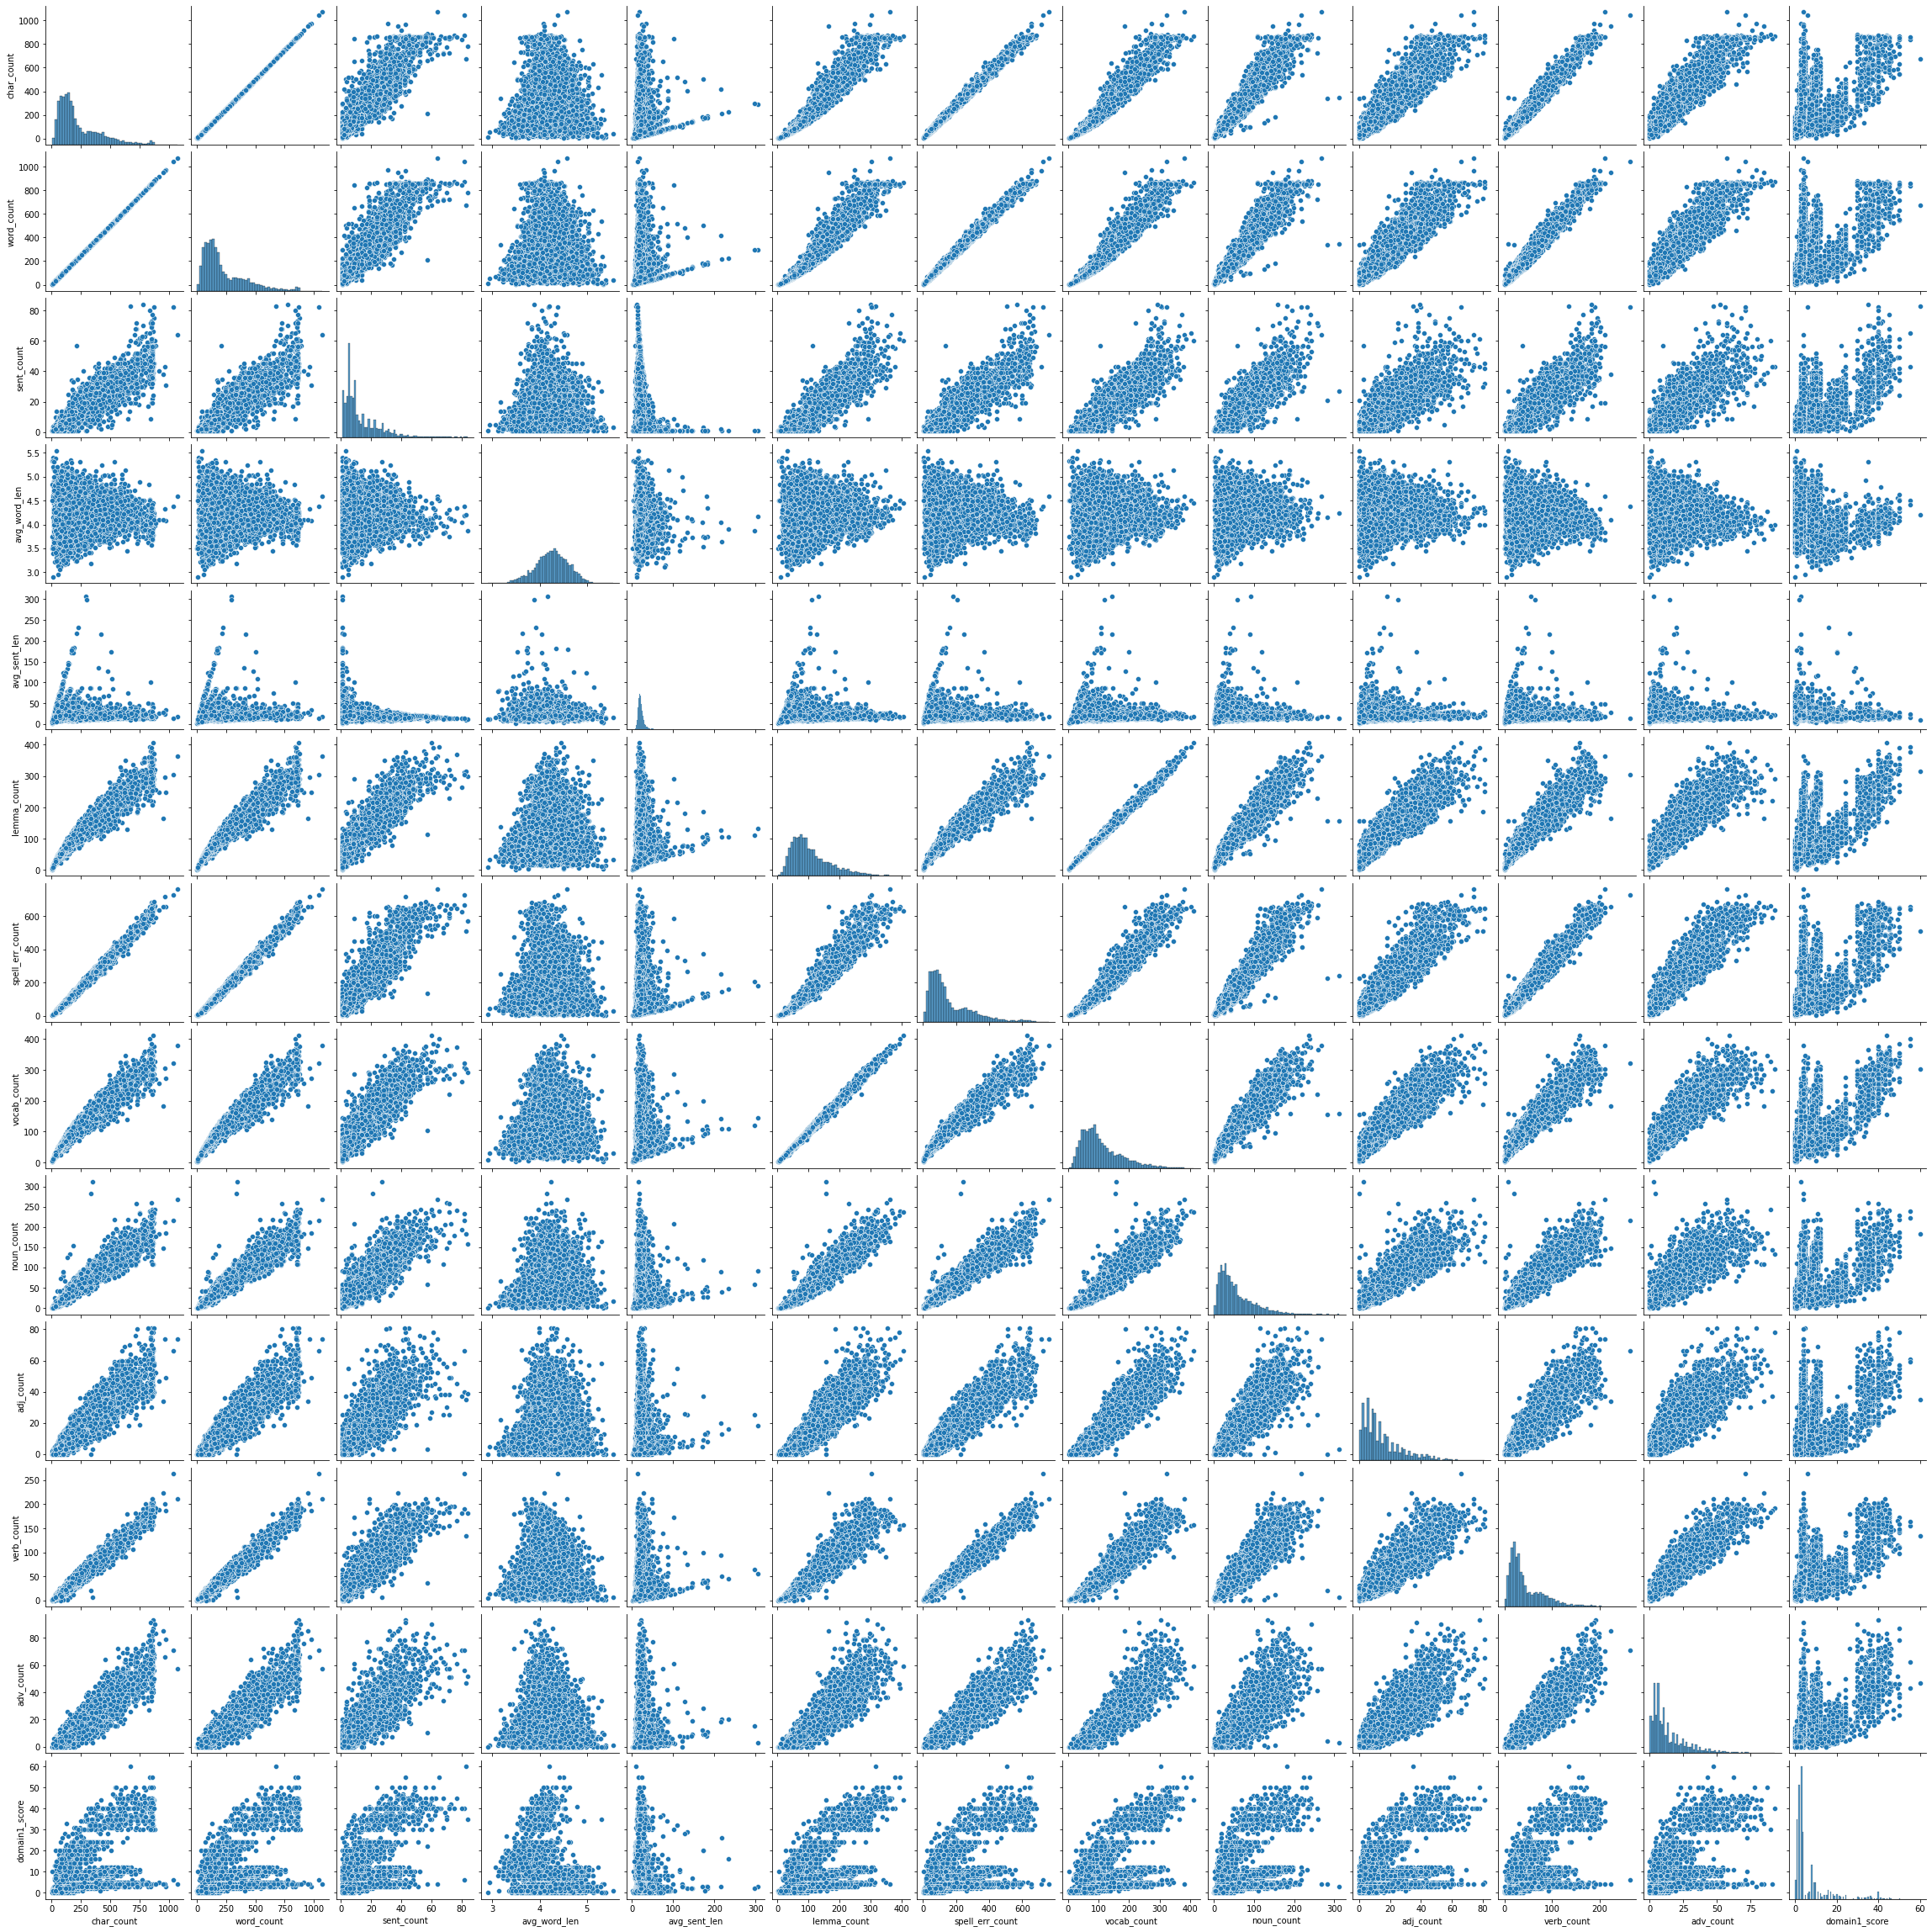

In [ ]:
sns.pairplot(eda_data)

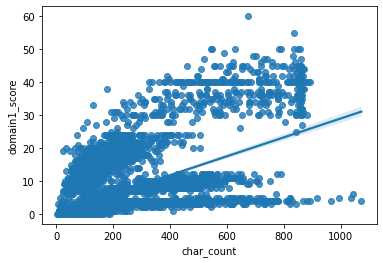

In [ ]:
sns.regplot(data=eda_data, x='char_count', y='domain1_score')

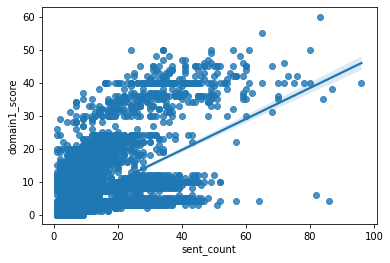

In [ ]:
sns.regplot(data=eda_data, x='sent_count', y='domain1_score')

> We can observe from the pairplot that the correlation between the features and the target, which is the domain 1 score are similar to one another. The ***average word length*** and ***average sentence length*** features however, shows a different relation where it does not seem to have a strong correlation with the target.

> And although we could see that there is somewhat a strong correlation between the features and the target, we can also observe that there are also quite the number of outliers.
Because of these outliers, a regression line will not fit towards the strong correlation trend as it would also consider the outliers as we can observe from the regplot above. 
But in the second regplot sample, the regression line in the sentence count which seem to have the least amount of outliers, seem lean towards the trend more.

> An additional observation is the correlation between our features. Most of them have a very linear relationship with one another. 
And similar to the correlation with the target, the average word length feature also does not have any strong correlation with other features as well.

## Create Models

### Setup Tools and Libraries

In [ ]:
from keras.layers import Embedding, Flatten, Dense, LSTM, Dropout, Bidirectional, Conv1D, MaxPooling1D, Input, concatenate, TextVectorization, Lambda
from keras.models import Model
import tensorflow as tf
from tensorflow_hub import KerasLayer
import pickle

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
nonseq_feature_count = len(nonseq_train_X.columns)

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def filter_words(word_tokens):  
    return [w for w in word_tokens if w not in stop_words]

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stem_words(word_tokens):
    normalized_sent = []
    
    for w in word_tokens:
        normalized_sent.append(ps.stem(w))
        
    return normalized_sent

In [ ]:
from nltk.tokenize import word_tokenize

def augment_features(inputs):
  new_inputs = []
  for input in inputs:
    input = input.lower()
    input = word_tokenize(input)
    input = filter_words(input)
    input = stem_words(input)
    new_inputs.append(input)
  return new_inputs

augment_features(["Hello", "World"])

[['hello'], ['world']]

In [ ]:
augmented_train_X = augment_features(train_X)
augmented_valid_X = augment_features(valid_X)
augmented_test_X = augment_features(test_X)

### Create Bag of Words Model

#### Preprocess

In [ ]:
vocab_size = 1000
bow_vectorizer = TextVectorization(max_tokens=vocab_size, output_mode='tf_idf')
bow_vectorizer.adapt([" ".join(x) for x in augmented_train_X])

def bow_preprocess(inputs):
  inputs = [" ".join(x) for x in inputs]
  return np.array([bow_vectorizer(input) for input in inputs])

bow_train_X = bow_preprocess(augmented_train_X) 
bow_valid_X = bow_preprocess(augmented_valid_X) 
bow_test_X = bow_preprocess(augmented_test_X) 

In [ ]:
np.save("drive/MyDrive/features csv/tf_idf_train_X.npy", bow_train_X)
np.save("drive/MyDrive/features csv/tf_idf_valid_X.npy", bow_valid_X)
np.save("drive/MyDrive/features csv/tf_idf_test_X.npy", bow_test_X)

In [ ]:
bow_train_X = np.load("drive/MyDrive/features csv/tf_idf_train_X.npy")
bow_valid_X = np.load("drive/MyDrive/features csv/tf_idf_valid_X.npy")
bow_test_X = np.load("drive/MyDrive/features csv/tf_idf_test_X.npy")

#### Build Model

In [ ]:
def create_bow_model():
  l_input = Input((vocab_size), name='text')
  l_x = Dense(vocab_size, activation="relu")(l_input)
  l_x = Dropout(0.4)(l_x)
  l_x = Dense(vocab_size // 2, activation="relu")(l_x)
  l_x = Dropout(0.2)(l_x)
  l_x = Dense(vocab_size // 4, activation="relu")(l_x)
  l_x = Dropout(0.1)(l_x)

  r_input = Input(nonseq_feature_count)
  r_x = Dense(nonseq_feature_count, activation="relu")(r_input)
  r_x = Dense(nonseq_feature_count, activation="relu")(r_x)

  c_size = vocab_size // 4 + nonseq_feature_count
  c_x = concatenate([l_x, r_x])
  c_x = Dense(c_size, activation="relu")(c_x)
  c_x = Dropout(0.3)(c_x)
  output = Dense(1, activation="relu")(c_x)

  model = Model([l_input, r_input], output)
  opt = tf.keras.optimizers.experimental.AdamW(learning_rate=0.00005)
  model.compile(loss = "mean_squared_error", optimizer = opt, metrics = ['mae', 'mse'])
  
  return model

bow_model = create_bow_model()
bow_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 1000)]       0           []                               
                                                                                                  
 dense_25 (Dense)               (None, 1000)         1001000     ['text[0][0]']                   
                                                                                                  
 dropout_13 (Dropout)           (None, 1000)         0           ['dense_25[0][0]']               
                                                                                                  
 dense_26 (Dense)               (None, 500)          500500      ['dropout_13[0][0]']             
                                                                                            

#### Train Model

In [ ]:
bow_checkpoint_path = "/tmp/checkpoints/bow"
bow_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=bow_checkpoint_path,save_weights_only=True, monitor='val_loss', mode='min',save_best_only=True)
bow_model.fit(
    [bow_train_X, nonseq_train_X],
    train_y,
    epochs = 100,
    validation_data = ([bow_valid_X, nonseq_valid_X], valid_y),
    verbose=2, callbacks=[early_stopping, bow_checkpoint],
    batch_size=64)
bow_model.load_weights(bow_checkpoint_path)

Epoch 1/100
122/122 - 2s - loss: 103.7314 - mae: 6.0204 - mse: 103.7314 - val_loss: 18.3957 - val_mae: 3.0294 - val_mse: 18.3957 - 2s/epoch - 17ms/step
Epoch 2/100
122/122 - 1s - loss: 19.9108 - mae: 2.6356 - mse: 19.9108 - val_loss: 12.1318 - val_mae: 2.0063 - val_mse: 12.1318 - 843ms/epoch - 7ms/step
Epoch 3/100
122/122 - 1s - loss: 10.6546 - mae: 1.9055 - mse: 10.6546 - val_loss: 8.2960 - val_mae: 1.5102 - val_mse: 8.2960 - 819ms/epoch - 7ms/step
Epoch 4/100
122/122 - 1s - loss: 7.3565 - mae: 1.5465 - mse: 7.3565 - val_loss: 5.8889 - val_mae: 1.2887 - val_mse: 5.8889 - 841ms/epoch - 7ms/step
Epoch 5/100
122/122 - 1s - loss: 5.7822 - mae: 1.3698 - mse: 5.7822 - val_loss: 8.9898 - val_mae: 1.6297 - val_mse: 8.9898 - 658ms/epoch - 5ms/step
Epoch 6/100
122/122 - 1s - loss: 4.8521 - mae: 1.2684 - mse: 4.8521 - val_loss: 4.9485 - val_mae: 1.1801 - val_mse: 4.9485 - 786ms/epoch - 6ms/step
Epoch 7/100
122/122 - 1s - loss: 4.3290 - mae: 1.1951 - mse: 4.3290 - val_loss: 5.0543 - val_mae: 1.16

In [ ]:
bow_model.save_weights("drive/MyDrive/features csv/bow_model_weights")

In [ ]:
bow_model.load_weights("drive/MyDrive/features csv/bow_model_weights")

### Create Embedding Model

#### Preprocess

In [ ]:
max_len = 1000
sequence_vectorizer = TextVectorization(max_tokens=vocab_size,output_mode='int',output_sequence_length=max_len)
sequence_vectorizer.adapt(train_X)

def embedding_preprocess(inputs):
  return np.array([sequence_vectorizer(input) for input in inputs])

embedding_train_X = embedding_preprocess(train_X) 
embedding_valid_X = embedding_preprocess(valid_X) 
embedding_test_X = embedding_preprocess(test_X) 

In [ ]:
np.save("drive/MyDrive/features csv/embedding_train_X.npy", embedding_train_X)
np.save("drive/MyDrive/features csv/embedding_valid_X.npy", embedding_valid_X)
np.save("drive/MyDrive/features csv/embedding_test_X.npy", embedding_test_X)

In [ ]:
embedding_train_X = np.load("drive/MyDrive/features csv/embedding_train_X.npy")
embedding_valid_X = np.load("drive/MyDrive/features csv/embedding_valid_X.npy")
embedding_test_X = np.load("drive/MyDrive/features csv/embedding_test_X.npy")

#### Build Model

In [ ]:
embedding_dim = 200
def create_embedding_model():
  l_input = Input((max_len),)
  l_x = Embedding(vocab_size, embedding_dim, name="embedding")(l_input)
  l_x = Bidirectional(LSTM(embedding_dim, return_sequences=True))(l_x)
  l_x = Dropout(0.3)(l_x)
  l_x = Bidirectional(LSTM(embedding_dim))(l_x)
  l_x = Dropout(0.2)(l_x)
  l_x = Dense(embedding_dim, activation="relu")(l_x)
  l_x = Dropout(0.2)(l_x)
  l_x = Dense(embedding_dim // 3, activation="relu")(l_x)
  
  r_input = Input(nonseq_feature_count)
  r_x = Dense(nonseq_feature_count, activation="softmax")(r_input)

  c_size = embedding_dim // 3 + nonseq_feature_count
  c_x = concatenate([l_x, r_x])
  c_x = Dense(c_size, activation="relu")(c_x)
  c_x = Dropout(0.3)(c_x)
  output = Dense(1, activation="relu")(c_x)

  model = Model([l_input, r_input], output)
  opt = tf.keras.optimizers.experimental.AdamW(learning_rate=0.0003)
  model.compile(loss = "mean_squared_error", optimizer = 'adam', metrics = ['mae', 'mse'])
  return model

embedding_model = create_embedding_model()
embedding_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1000, 200)    200000      ['input_6[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  (None, 1000, 400)    641600      ['embedding[0][0]']              
                                                                                                  
 dropout_17 (Dropout)           (None, 1000, 400)    0           ['bidirectional[0][0]']          
                                                                                            

#### Train Model

In [ ]:
embedding_checkpoint_path = "/embedding_checkpoint"
embedding_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=embedding_checkpoint_path,save_weights_only=True, monitor='val_loss', mode='min',save_best_only=True)
embedding_model.fit(
    [embedding_train_X, nonseq_train_X],
    train_y,
    epochs = 100,
    validation_data = ([embedding_valid_X, nonseq_valid_X], valid_y),
    verbose=2,
    callbacks=[early_stopping, embedding_checkpoint],
    batch_size=64)
embedding_model.load_weights(embedding_checkpoint_path)

Epoch 1/100
122/122 - 57s - loss: 62.5454 - mae: 4.6469 - mse: 62.5454 - val_loss: 32.7799 - val_mae: 3.1627 - val_mse: 32.7799 - 57s/epoch - 469ms/step
Epoch 2/100
122/122 - 51s - loss: 28.7085 - mae: 2.9264 - mse: 28.7085 - val_loss: 35.5282 - val_mae: 2.9158 - val_mse: 35.5282 - 51s/epoch - 417ms/step
Epoch 3/100
122/122 - 51s - loss: 20.6743 - mae: 2.4377 - mse: 20.6743 - val_loss: 19.1802 - val_mae: 2.0028 - val_mse: 19.1802 - 51s/epoch - 418ms/step
Epoch 4/100
122/122 - 51s - loss: 15.5635 - mae: 2.1487 - mse: 15.5635 - val_loss: 11.7053 - val_mae: 1.8078 - val_mse: 11.7053 - 51s/epoch - 416ms/step
Epoch 5/100
122/122 - 51s - loss: 10.3206 - mae: 1.8274 - mse: 10.3206 - val_loss: 13.0705 - val_mae: 1.7182 - val_mse: 13.0705 - 51s/epoch - 416ms/step
Epoch 6/100
122/122 - 51s - loss: 8.3785 - mae: 1.6626 - mse: 8.3785 - val_loss: 11.1809 - val_mae: 1.6006 - val_mse: 11.1809 - 51s/epoch - 416ms/step
Epoch 7/100
122/122 - 51s - loss: 6.7939 - mae: 1.4750 - mse: 6.7939 - val_loss: 6.1

In [ ]:
embedding_model.save_weights("drive/MyDrive/features csv/embedding_model_weights")

In [ ]:
embedding_model.load_weights("drive/MyDrive/features csv/embedding_model_weights")

### Create Word2Vec + LSTM Model

Adapted from https://github.com/mayurmorin/Automated-Essay--Scoring/blob/master/Training%20LSTM%20Model.ipynb

#### Preprocessing

In [ ]:
from gensim.models import Word2Vec

num_features = 320 
min_word_count = 40
num_workers = 4
context = 10
downsampling = 1e-3
def create_w2v_preprocess_model():
  sentences_per_essay = [nltk.sent_tokenize(essay) for essay in train["essay"]]
  sentences = [sentence.split() for sentences in sentences_per_essay for sentence in sentences if len(sentences) > 0]
  return Word2Vec(sentences, workers=num_workers, size=num_features, min_count = min_word_count, window = context, sample = downsampling)

w2v_preprocess_model = create_w2v_preprocess_model()

In [ ]:
def create_feature_vector(words, model, num_features):
    featureVec = np.zeros((num_features,),dtype="float32")
    num_words = 1
    index2word_set = set(w2v_preprocess_model.wv.index2word)
    for word in words:
        if word in index2word_set:
            num_words += 1
            featureVec = np.add(featureVec, model[word])        
    featureVec = np.divide(featureVec,num_words)
    return featureVec

def w2v_preprocess(inputs):
  inputs = augment_features(inputs)
  preprocessed = np.array([create_feature_vector(input, w2v_preprocess_model, num_features) for input in inputs])
  preprocessed = preprocessed.reshape((preprocessed.shape[0], 1, preprocessed.shape[1]))
  return preprocessed

w2v_train_X = w2v_preprocess(train_X)
w2v_valid_X = w2v_preprocess(valid_X)
w2v_test_X = w2v_preprocess(test_X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
np.save("drive/MyDrive/features csv/w2v_train_X.npy", w2v_train_X)
np.save("drive/MyDrive/features csv/w2v_valid_X.npy", w2v_valid_X)
np.save("drive/MyDrive/features csv/w2v_test_X.npy", w2v_test_X)

In [ ]:
w2v_train_X = np.load("drive/MyDrive/features csv/w2v_train_X.npy")
w2v_valid_X = np.load("drive/MyDrive/features csv/w2v_valid_X.npy")
w2v_test_X = np.load("drive/MyDrive/features csv/w2v_test_X.npy")

#### Build Model

In [ ]:
from keras.models import Sequential

def create_w2v_lstm_model():
  l_input = Input((1, num_features), name='text')
  l_x = Bidirectional(LSTM(num_features,  return_sequences = True))(l_input)
  l_x = Dropout(0.3)(l_x)
  l_x = Bidirectional(LSTM(num_features // 2))(l_x)
  l_x = Dropout(0.2)(l_x)

  r_input = Input(nonseq_feature_count)
  r_x = Dense(nonseq_feature_count, activation="relu")(r_input)
  r_x = Dense(nonseq_feature_count, activation="relu")(r_x)

  combined = concatenate([l_x, r_x])
  c_x = Dense(num_features + nonseq_feature_count, activation="relu")(combined)
  c_x = Dropout(0.3)(c_x)
  output = Dense(1, activation="relu")(c_x)

  model = Model([l_input, r_input], output)
  opt = tf.keras.optimizers.experimental.AdamW(learning_rate=0.0001)
  model.compile(loss = "mean_squared_error", optimizer = opt, metrics = ['mae', 'mse'])
  return model

w2v_model = create_w2v_lstm_model()
w2v_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, 1, 320)]     0           []                               
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 1, 640)      1640960     ['text[0][0]']                   
 )                                                                                                
                                                                                                  
 dropout_21 (Dropout)           (None, 1, 640)       0           ['bidirectional_2[0][0]']        
                                                                                                  
 input_8 (InputLayer)           [(None, 12)]         0           []                         

#### Train Model

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
w2v_checkpoint_path = "/w2v_checkpoint"
w2v_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=w2v_checkpoint_path,save_weights_only=True, monitor='val_loss', mode='min',save_best_only=True)
w2v_model.fit(
    [w2v_train_X, nonseq_train_X],
    train_y,
    epochs = 100,
    validation_data = ([w2v_valid_X, nonseq_valid_X], valid_y),
    verbose=2,
    callbacks=[early_stopping, w2v_checkpoint],
    batch_size=64)
w2v_model.load_weights(w2v_checkpoint_path)

Epoch 1/100
122/122 - 16s - loss: 23.6225 - mae: 2.7222 - mse: 23.6225 - val_loss: 9.4612 - val_mae: 1.8289 - val_mse: 9.4612 - 16s/epoch - 128ms/step
Epoch 2/100
122/122 - 2s - loss: 8.5449 - mae: 1.7570 - mse: 8.5449 - val_loss: 7.6406 - val_mae: 1.6198 - val_mse: 7.6406 - 2s/epoch - 14ms/step
Epoch 3/100
122/122 - 2s - loss: 7.1706 - mae: 1.5883 - mse: 7.1706 - val_loss: 6.7201 - val_mae: 1.4819 - val_mse: 6.7201 - 2s/epoch - 13ms/step
Epoch 4/100
122/122 - 2s - loss: 6.6108 - mae: 1.4846 - mse: 6.6108 - val_loss: 6.1933 - val_mae: 1.3886 - val_mse: 6.1933 - 2s/epoch - 15ms/step
Epoch 5/100
122/122 - 3s - loss: 6.0786 - mae: 1.4196 - mse: 6.0786 - val_loss: 5.8775 - val_mae: 1.3321 - val_mse: 5.8775 - 3s/epoch - 21ms/step
Epoch 6/100
122/122 - 2s - loss: 5.8643 - mae: 1.3787 - mse: 5.8643 - val_loss: 5.7298 - val_mae: 1.2856 - val_mse: 5.7298 - 2s/epoch - 15ms/step
Epoch 7/100
122/122 - 2s - loss: 5.5036 - mae: 1.3309 - mse: 5.5036 - val_loss: 5.6097 - val_mae: 1.2585 - val_mse: 5.6

In [ ]:
w2v_model.save_weights("drive/MyDrive/features csv/w2v_model_weights")

In [ ]:
w2v_model.load_weights("drive/MyDrive/features csv/w2v_model_weights")

### Create BERT Model

#### Preprocess

In [ ]:
import tensorflow_text as text
import tensorflow_hub as hub
import tensorflow as tf

tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

def make_bert_preprocess_model(sentence_features, seq_length=128):
  input_segments = [tf.keras.layers.Input(shape=(), dtype=tf.string, name=ft) for ft in sentence_features]

  bert_preprocess = hub.load(tfhub_handle_preprocess)
  tokenizer = hub.KerasLayer(bert_preprocess.tokenize, name='tokenizer')
  segments = [tokenizer(s) for s in input_segments]

  truncated_segments = segments

  packer = hub.KerasLayer(bert_preprocess.bert_pack_inputs, arguments=dict(seq_length=seq_length),name='packer')
  model_inputs = packer(truncated_segments)
  return tf.keras.Model(input_segments, model_inputs)

seq_length = 300
bert_preprocess = make_bert_preprocess_model(["sentence"], seq_length)

#### Build Model

In [ ]:
tfhub_handle_encoder = "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/2"
def create_bert_plus_model():
  l_input = Input((), dtype=tf.string, name='text')
  l_x = bert_preprocess(l_input)
  l_x = KerasLayer(tfhub_handle_encoder, trainable=True)(l_x)["pooled_output"]
  l_x = Dense(256, activation="relu")(l_x)
  l_x = Dropout(0.3)(l_x)

  r_input = Input(nonseq_feature_count)
  r_x = Dense(nonseq_feature_count, activation="softmax")(r_input)

  c_size = 256 + nonseq_feature_count
  c_x = concatenate([l_x, r_x])
  c_x = Dense(c_size, activation="relu")(c_x)
  c_x = Dropout(0.3)(c_x)
  output = Dense(1, activation="relu")(c_x)

  model = Model([l_input, r_input], output)
  opt = tf.keras.optimizers.experimental.AdamW(learning_rate=0.00005)
  model.compile(loss = "mean_squared_error", optimizer = opt, metrics = ['mae', 'mse'])
  return model
bert_plus_model = create_bert_plus_model()
bert_plus_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 model_7 (Functional)           {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 300),                                                      
                                 'input_type_ids':                                                
                                (None, 300),                                                      
                                 'input_mask': (Non                                               
                                e, 300)}                                                    

#### Train

In [ ]:
bert_plus_checkpoint_path = "/tmp/checkpoints/bert_plus"
bert_plus_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=bert_plus_checkpoint_path,save_weights_only=True, monitor='val_loss', mode='min',save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
bert_plus_model.fit(
    [train_X, nonseq_train_X],
    train_y,
    epochs = 100,
    validation_data = ([valid_X, nonseq_valid_X], valid_y),
    verbose=2,
    callbacks=[early_stopping, bert_plus_checkpoint],
    batch_size=64)
bert_plus_model.load_weights(bert_plus_checkpoint_path)

Epoch 1/100
122/122 - 85s - loss: 62.9195 - mae: 3.9518 - mse: 62.9195 - val_loss: 22.7750 - val_mae: 2.1164 - val_mse: 22.7750 - 85s/epoch - 695ms/step
Epoch 2/100
122/122 - 68s - loss: 13.8452 - mae: 1.9683 - mse: 13.8452 - val_loss: 7.1791 - val_mae: 1.4452 - val_mse: 7.1791 - 68s/epoch - 558ms/step
Epoch 3/100
122/122 - 69s - loss: 7.4475 - mae: 1.5271 - mse: 7.4475 - val_loss: 6.1755 - val_mae: 1.2495 - val_mse: 6.1755 - 69s/epoch - 562ms/step
Epoch 4/100
122/122 - 68s - loss: 5.2997 - mae: 1.3307 - mse: 5.2997 - val_loss: 5.3924 - val_mae: 1.1635 - val_mse: 5.3924 - 68s/epoch - 559ms/step
Epoch 5/100
122/122 - 68s - loss: 4.8463 - mae: 1.2781 - mse: 4.8463 - val_loss: 4.8052 - val_mae: 1.0931 - val_mse: 4.8052 - 68s/epoch - 559ms/step
Epoch 6/100
122/122 - 68s - loss: 4.3530 - mae: 1.2137 - mse: 4.3530 - val_loss: 4.5966 - val_mae: 1.0916 - val_mse: 4.5966 - 68s/epoch - 556ms/step
Epoch 7/100
122/122 - 68s - loss: 4.1568 - mae: 1.1770 - mse: 4.1568 - val_loss: 4.6593 - val_mae: 1

In [ ]:
bert_plus_model.save_weights("drive/MyDrive/features csv/bert_plus_model_weights")

In [ ]:
bert_plus_model.load_weights("drive/MyDrive/features csv/bert_plus_model_weights")

## Evaluate Models

In [ ]:
from sklearn.metrics import cohen_kappa_score, mean_squared_error, mean_absolute_error

models = [bow_model, embedding_model, w2v_model, bert_plus_model]
model_names = ["Bag of Words + FC","Embedding + BLSTM","Word2Vec + BLSTM","BERT"]
test_Xs = [bow_test_X, embedding_test_X, w2v_test_X, test_X]

predicted_ys = [model.predict([preprocessed_test_X, nonseq_test_X]) for model, preprocessed_test_X in zip(models, test_Xs)]

kappa_scores = [cohen_kappa_score(test_y,  np.rint(predicted_y)) for predicted_y in predicted_ys]
mses = [mean_squared_error(test_y, predicted_y) for predicted_y in predicted_ys]
maes = [mean_absolute_error(test_y, predicted_y) for predicted_y in predicted_ys]

scores = pd.DataFrame({
    "Model Name": model_names,
    "Cohen Kappa Score": kappa_scores,
    "Mean Squared Error": mses,
    "Mean Absolute Error": maes,
})
scores

,Model Name,Cohen Kappa Score,Mean Squared Error,Mean Absolute Error
0,Bag of Words + FC,0.435404,3.683897,0.998633
1,Embedding + BLSTM,0.307457,3.933539,1.129663
2,Word2Vec + BLSTM,0.440318,2.883056,0.924966
3,BERT,0.407229,2.927940,0.938171


[Text(0.5, 1.0, 'Cohen Kappa Score of Each Model')]

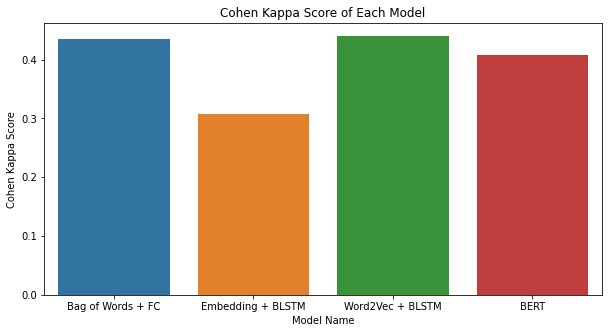

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=scores, x="Model Name", y="Cohen Kappa Score", ax=ax)
ax.set(title="Cohen Kappa Score of Each Model")

[Text(0.5, 1.0, 'Mean Squared Error of Each Model')]

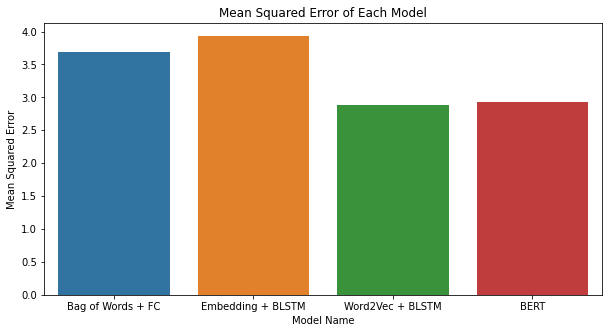

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=scores, x="Model Name", y="Mean Squared Error", ax=ax)
ax.set(title="Mean Squared Error of Each Model")

[Text(0.5, 1.0, 'Mean Absolute Error of Each Model')]

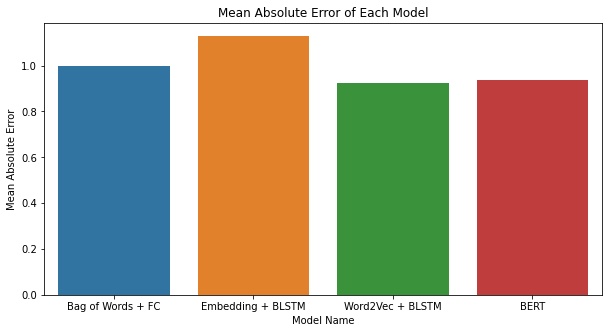

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=scores, x="Model Name", y="Mean Absolute Error", ax=ax)
ax.set(title="Mean Absolute Error of Each Model")

In [ ]:
predictions = [[value[0] for value in predicted_y] for predicted_y in predicted_ys] + [test_y]
predictions = pd.DataFrame({model_name:np.rint(prediction) for model_name, prediction in zip(model_names + ["Ground Truth"], predictions)})
predictions

,Bag of Words + FC,Embedding + BLSTM,Word2Vec + BLSTM,BERT,Ground Truth
0,17.0,16.0,16.0,16.0,18.0
1,16.0,18.0,19.0,20.0,20.0
2,6.0,8.0,7.0,7.0,8.0
3,42.0,35.0,41.0,41.0,30.0
4,12.0,10.0,10.0,11.0,9.0
...,...,...,...,...,...
2591,3.0,3.0,3.0,4.0,3.0
2592,6.0,2.0,10.0,7.0,8.0
2593,1.0,1.0,1.0,0.0,1.0
2594,3.0,4.0,4.0,4.0,4.0


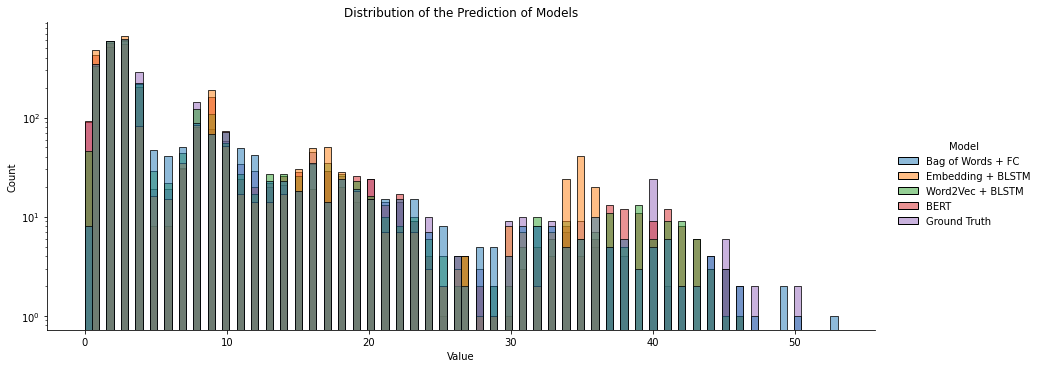

In [ ]:
import matplotlib.pyplot as plt

ax = sns.displot(pd.melt(predictions).rename(columns={"variable": "Model", "value":"Value"}), hue="Model", x="Value", aspect=2.5)
ax.set(yscale="log", title="Distribution of the Prediction of Models")

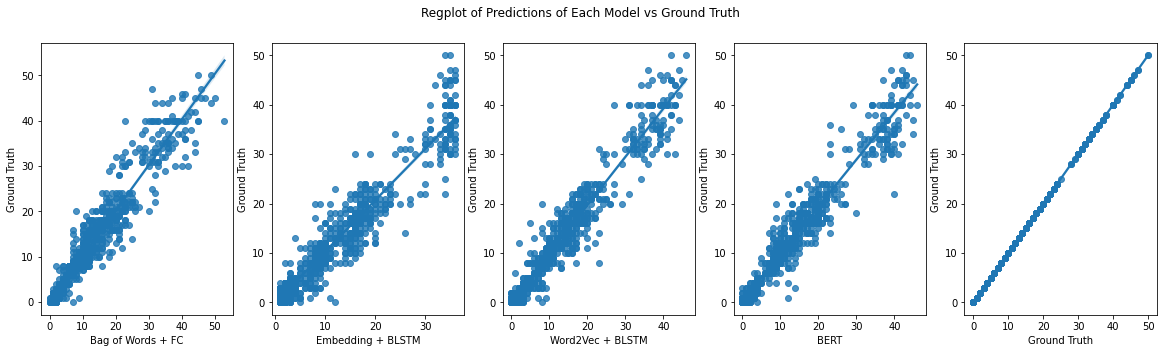

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(20,5))
fig.suptitle('Regplot of Predictions of Each Model vs Ground Truth', fontsize=12)

for index, model_name in enumerate(predictions.columns):
  sns.regplot(data = predictions, x = model_name, y = "Ground Truth", ax=axes[index])

plt.show()